In [3]:
import pandas as pd

# Load ClimateWins weather observations (UNSCALED)
weather = pd.read_csv("Dataset-weather-prediction-dataset-processed.csv")

# Load pleasant weather target
pleasant = pd.read_csv("Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv")

print("Weather shape:", weather.shape)
print("Pleasant shape:", pleasant.shape)




Weather shape: (22950, 170)
Pleasant shape: (22950, 16)


In [4]:
# Combine features and target
climatewins_cleaned = pd.concat([weather, pleasant], axis=1)

# Export cleaned, unscaled dataset for Exercise 2.3
climatewins_cleaned.to_csv(
    "climatewins_ex2_2_cleaned_unscaled.csv",
    index=False
)

print("Export complete: climatewins_ex2_2_cleaned_unscaled.csv")



Export complete: climatewins_ex2_2_cleaned_unscaled.csv


In [5]:
import pandas as pd

# Load the cleaned, unscaled dataset exported from Exercise 2.2
df = pd.read_csv("climatewins_ex2_2_cleaned_unscaled.csv")

print("Full dataset shape:", df.shape)
df.head()


Full dataset shape: (22950, 186)


,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,0,0,0,0,0,0,0,0,0,0
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,0,0,0,0,0,0,0,0,0,0
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,0,0,0,0,0,0,0,0,0,0
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,0,0,0,0,0,0,0,0,0,0


In [6]:
print(df.columns.tolist())


['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_wind_speed', 'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_snow_depth', 'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max', 'BELGRADE_cloud_cover', 'BELGRADE_humidity', 'BELGRADE_pressure', 'BELGRADE_global_radiation', 'BELGRADE_precipitation', 'BELGRADE_sunshine', 'BELGRADE_temp_mean', 'BELGRADE_temp_min', 'BELGRADE_temp_max', 'BUDAPEST_cloud_cover', 'BUDAPEST_humidity', 'BUDAPEST_pressure', 'BUDAPEST_global_radiation', 'BUDAPEST_precipitation', 'BUDAPEST_sunshine', 'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max', 'DEBILT_cloud_cover', 'DEBILT_wind_speed', 'DEBILT_humidity', 'DEBILT_pressure', 'DEBILT_global_radiation', 'DEBILT_precipitation', 'DEBILT_sunshine', 'DEBILT_temp_mean', 'DEBILT_temp_min', 'DEBILT_temp_max', 'DUSSELDORF_cloud_cover', 'DUSSELDORF_wind_speed', 'DUSSELDORF_humidity', 'DUSSELDORF_pressure', 'DUSSELDORF_global_radiation', 'DUSSELDORF_pr

In [8]:
target_col = "BASEL_pleasant_weather"


X = df.drop(columns=[target_col])
y = df[target_col]

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Target value counts:\n", y.value_counts(dropna=False))


X shape: (22950, 185)
y shape: (22950,)
Target value counts:
 BASEL_pleasant_weather
0    17286
1     5664
Name: count, dtype: int64


In [9]:
# Drop ALL pleasant_weather columns except the target
pleasant_cols = [col for col in df.columns if "pleasant_weather" in col]

X = df.drop(columns=pleasant_cols)
y = df[target_col]

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Target value counts:\n", y.value_counts())


X shape: (22950, 171)
y shape: (22950,)
Target value counts:
 BASEL_pleasant_weather
0    17286
1     5664
Name: count, dtype: int64


In [12]:
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')

print("Min date:", df['DATE'].min())
print("Max date:", df['DATE'].max())

df['YEAR'] = df['DATE'].dt.year
print("Unique years:", df['YEAR'].nunique())
print("First 10 years:", sorted(df['YEAR'].dropna().unique())[:10])
print("Last 10 years:", sorted(df['YEAR'].dropna().unique())[-10:])



Min date: 1970-01-01 00:00:00.019600101
Max date: 1970-01-01 00:00:00.020221031
Unique years: 1
First 10 years: [np.int32(1970)]
Last 10 years: [np.int32(1970)]


In [13]:
start_year = 1990
end_year = 1999

df_decade = df[(df['YEAR'] >= start_year) & (df['YEAR'] <= end_year)].copy()

pleasant_cols = [col for col in df_decade.columns if "pleasant_weather" in col]
target_col = "BASEL_pleasant_weather"

# Features: drop pleasant columns AND date-like fields
X_decade = df_decade.drop(columns=pleasant_cols + ['DATE', 'MONTH', 'YEAR'], errors='ignore')
y_decade = df_decade[target_col]

print("Decade rows:", df_decade.shape[0])
print("X_decade shape:", X_decade.shape)
print("y_decade shape:", y_decade.shape)
print("Target counts:\n", y_decade.value_counts())


Decade rows: 0
X_decade shape: (0, 169)
y_decade shape: (0,)
Target counts:
 Series([], Name: count, dtype: int64)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Tree 1
plt.figure(figsize=(22, 10))
plot_tree(clf.estimators_[5], max_depth=3, filled=True, feature_names=X_decade.columns, class_names=True)
plt.title("Random Forest - Tree #5 (max_depth shown = 3)")
plt.show()

# Tree 2
plt.figure(figsize=(22, 10))
plot_tree(clf.estimators_[25], max_depth=3, filled=True, feature_names=X_decade.columns, class_names=True)
plt.title("Random Forest - Tree #25 (max_depth shown = 3)")
plt.show()


In [16]:
# Look for any obvious year/time columns
[c for c in df.columns if "year" in c.lower() or "date" in c.lower() or "time" in c.lower()]


['DATE', 'DATE.1', 'YEAR']

In [17]:
# Build X and y again (safe, leakage-free)
target_col = "BASEL_pleasant_weather"
pleasant_cols = [col for col in df.columns if "pleasant_weather" in col]

X = df.drop(columns=pleasant_cols, errors="ignore")
y = df[target_col]

# Drop date-like columns (not useful for RF here)
X = X.drop(columns=["DATE", "MONTH"], errors="ignore")

# Subset to ~one decade worth of rows (per course hint)
n_decade = 3653
df_subset = X.copy()
df_subset["target"] = y.values

df_decade = df_subset.sample(n=n_decade, random_state=42)

X_decade = df_decade.drop(columns=["target"])
y_decade = df_decade["target"]

print("X_decade shape:", X_decade.shape)
print("y_decade shape:", y_decade.shape)
print("Target counts:\n", y_decade.value_counts())


X_decade shape: (3653, 170)
y_decade shape: (3653,)
Target counts:
 target
0    2771
1     882
Name: count, dtype: int64


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(
    X_decade, y_decade, test_size=0.2, random_state=42, stratify=y_decade
)

clf = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    random_state=42,
    n_jobs=-1
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)

print("Random Forest Accuracy:", acc)


Random Forest Accuracy: 0.9753761969904241


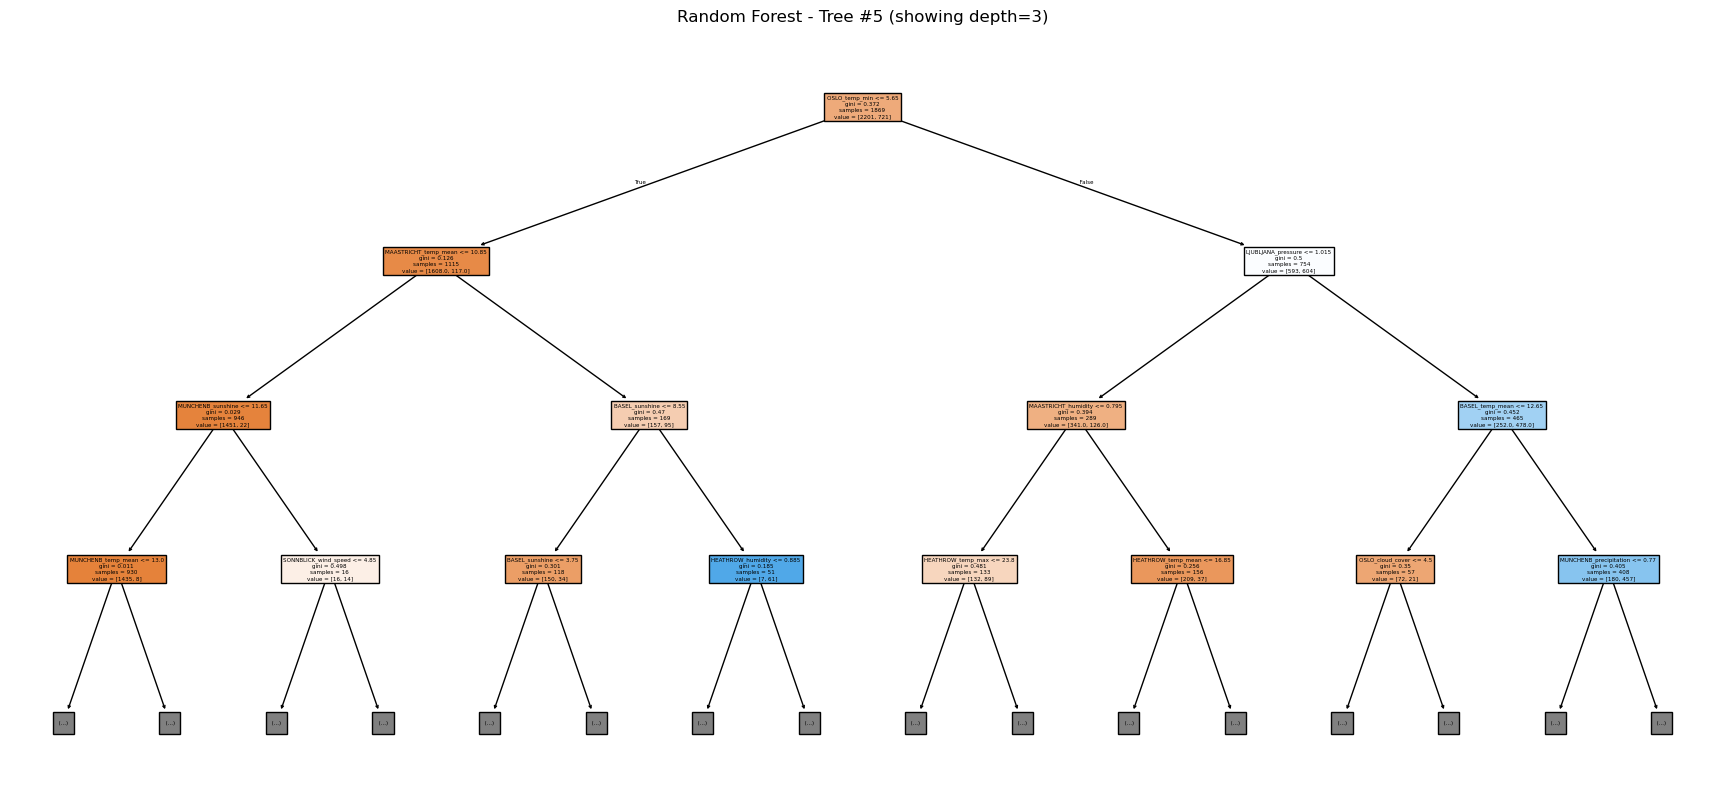

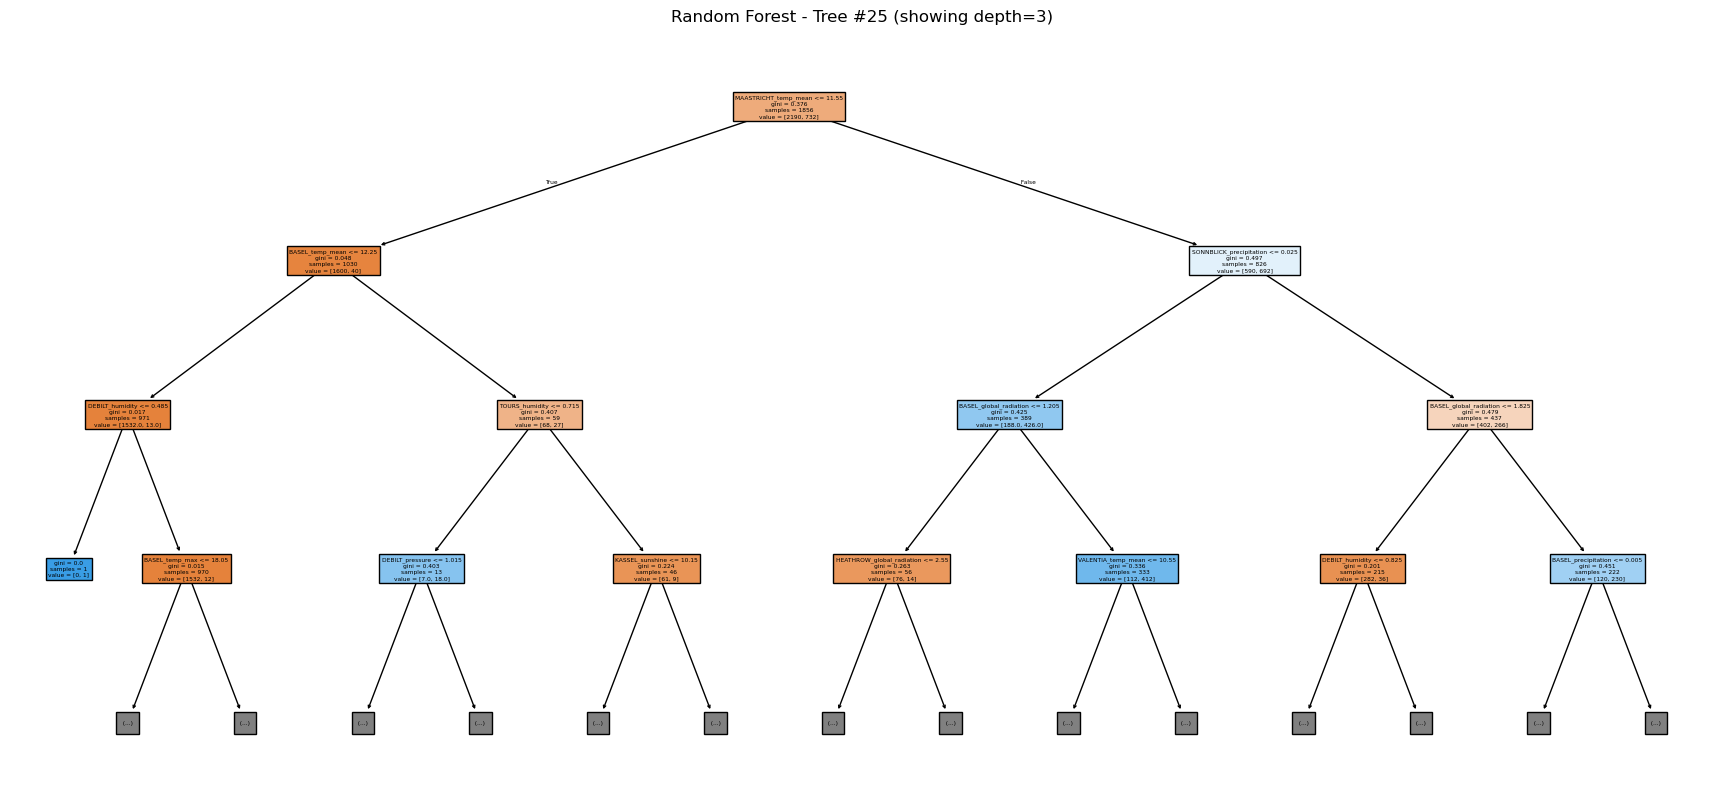

In [19]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Tree 1
plt.figure(figsize=(22, 10))
plot_tree(clf.estimators_[5], max_depth=3, filled=True, feature_names=X_decade.columns)
plt.title("Random Forest - Tree #5 (showing depth=3)")
plt.show()

# Tree 2
plt.figure(figsize=(22, 10))
plot_tree(clf.estimators_[25], max_depth=3, filled=True, feature_names=X_decade.columns)
plt.title("Random Forest - Tree #25 (showing depth=3)")
plt.show()


In [20]:
import numpy as np
import pandas as pd

# Extract feature importances
importances = clf.feature_importances_

print("Importances length:", len(importances))
print("X_decade feature count:", X_decade.shape[1])


Importances length: 170
X_decade feature count: 170


Number of stations found: 20

Top 10 stations by importance:
 station
BASEL         0.391706
DUSSELDORF    0.083208
MUNCHENB      0.069840
DEBILT        0.067815
TOURS         0.067515
MAASTRICHT    0.064188
LJUBLJANA     0.037424
HEATHROW      0.034054
MADRID        0.031509
OSLO          0.031210
Name: importance, dtype: float64


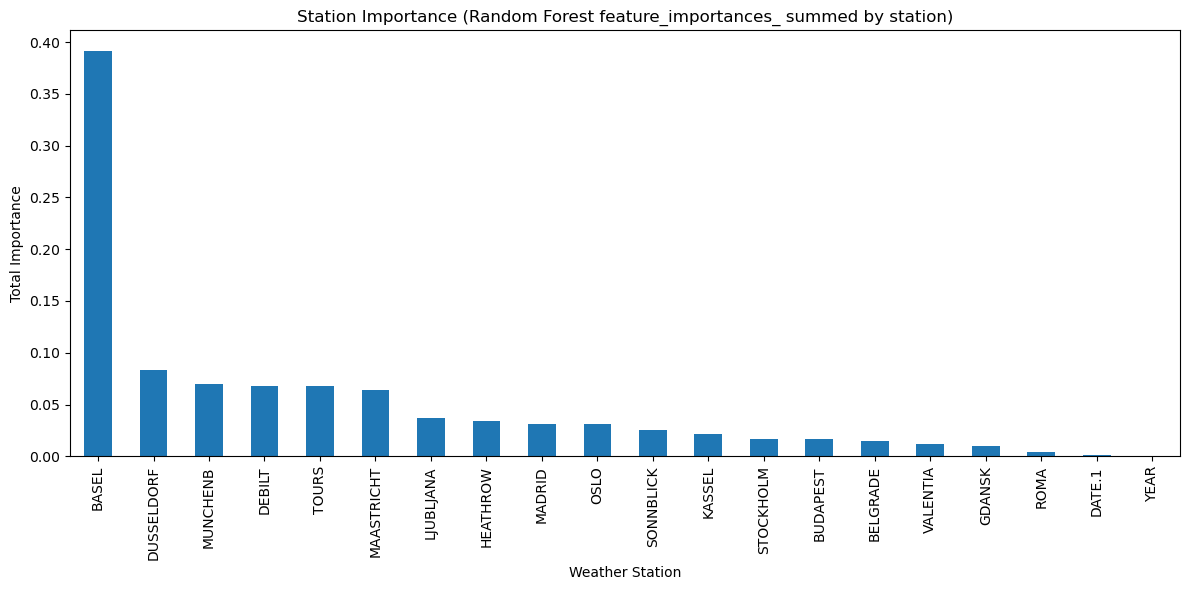


Top 3 stations: ['BASEL', 'DUSSELDORF', 'MUNCHENB']


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

# 1) Build a dataframe of feature importances
feat_imp = pd.DataFrame({
    "feature": X_decade.columns,
    "importance": clf.feature_importances_
})

# 2) Extract station name from feature (everything before the first underscore)
# Example: "BASEL_temp_mean" -> "BASEL"
feat_imp["station"] = feat_imp["feature"].str.split("_").str[0]

# 3) Aggregate importances by station
station_imp = (
    feat_imp.groupby("station")["importance"]
    .sum()
    .sort_values(ascending=False)
)

print("Number of stations found:", station_imp.shape[0])
print("\nTop 10 stations by importance:\n", station_imp.head(10))

# 4) Plot station importances
plt.figure(figsize=(12, 6))
station_imp.plot(kind="bar")
plt.title("Station Importance (Random Forest feature_importances_ summed by station)")
plt.ylabel("Total Importance")
plt.xlabel("Weather Station")
plt.tight_layout()
plt.show()

# 5) Capture top 3 stations for next steps
top3_stations = station_imp.head(3).index.tolist()
print("\nTop 3 stations:", top3_stations)



STATION MODEL: BASEL
X_station shape: (3653, 11)
y_station shape: (3653,)
Target counts:
 target
0    2771
1     882
Name: count, dtype: int64
Accuracy: 1.0


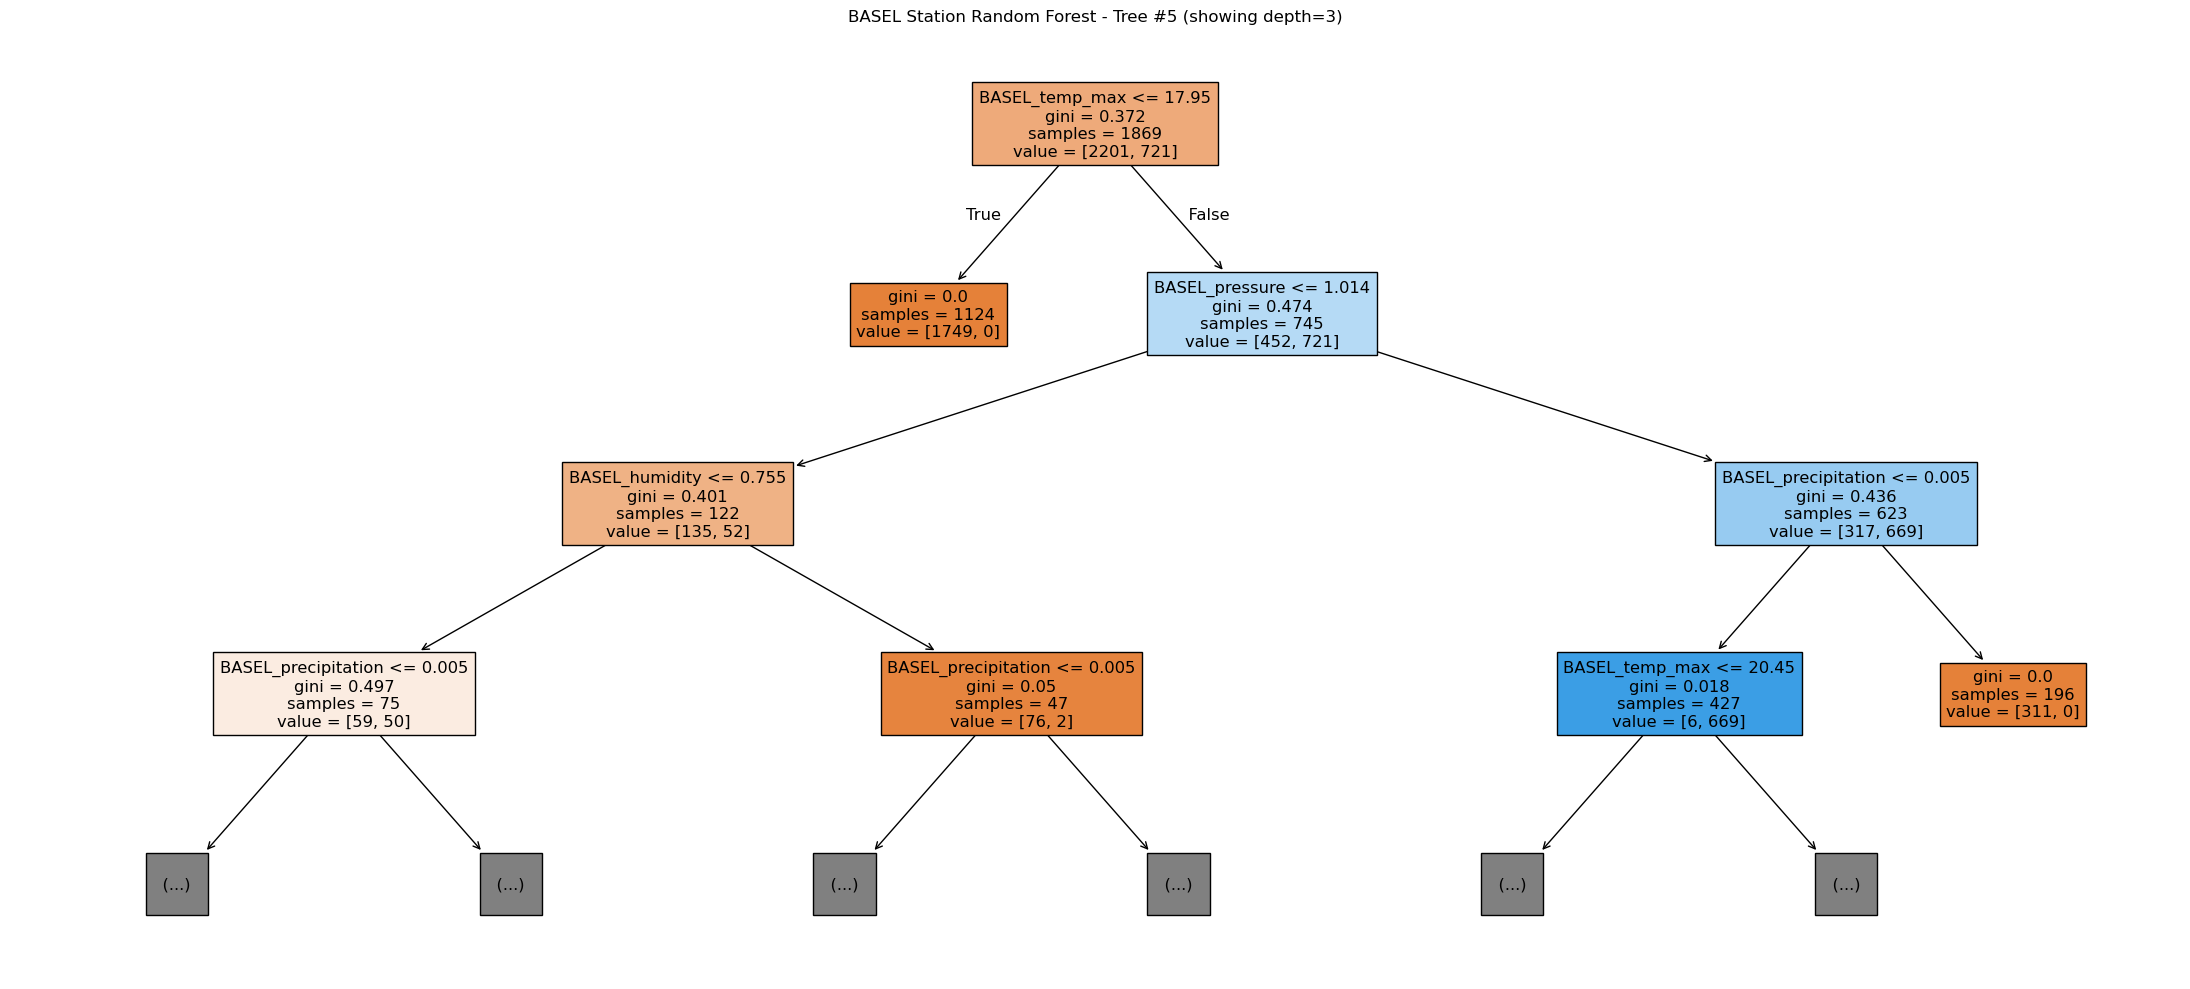

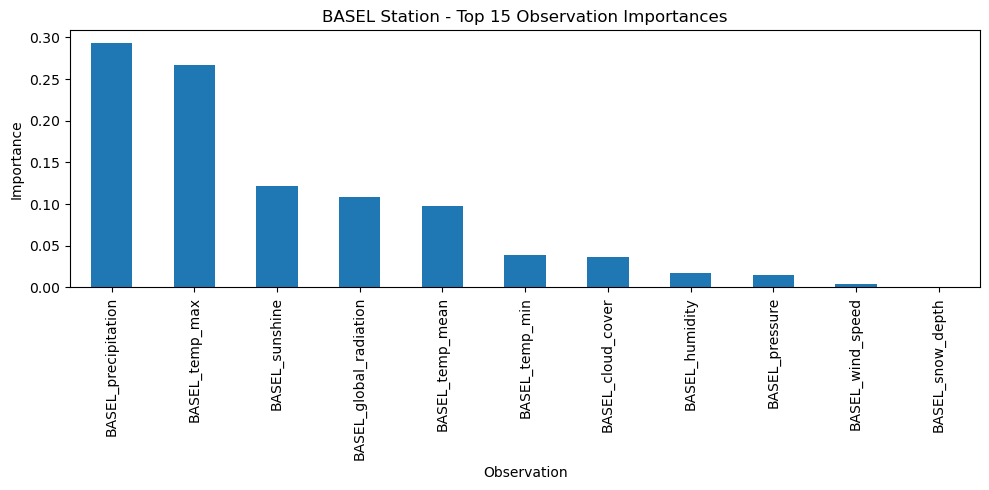


STATION MODEL: DUSSELDORF
X_station shape: (3653, 11)
y_station shape: (3653,)
Target counts:
 target
0    2771
1     882
Name: count, dtype: int64
Accuracy: 0.8399452804377565


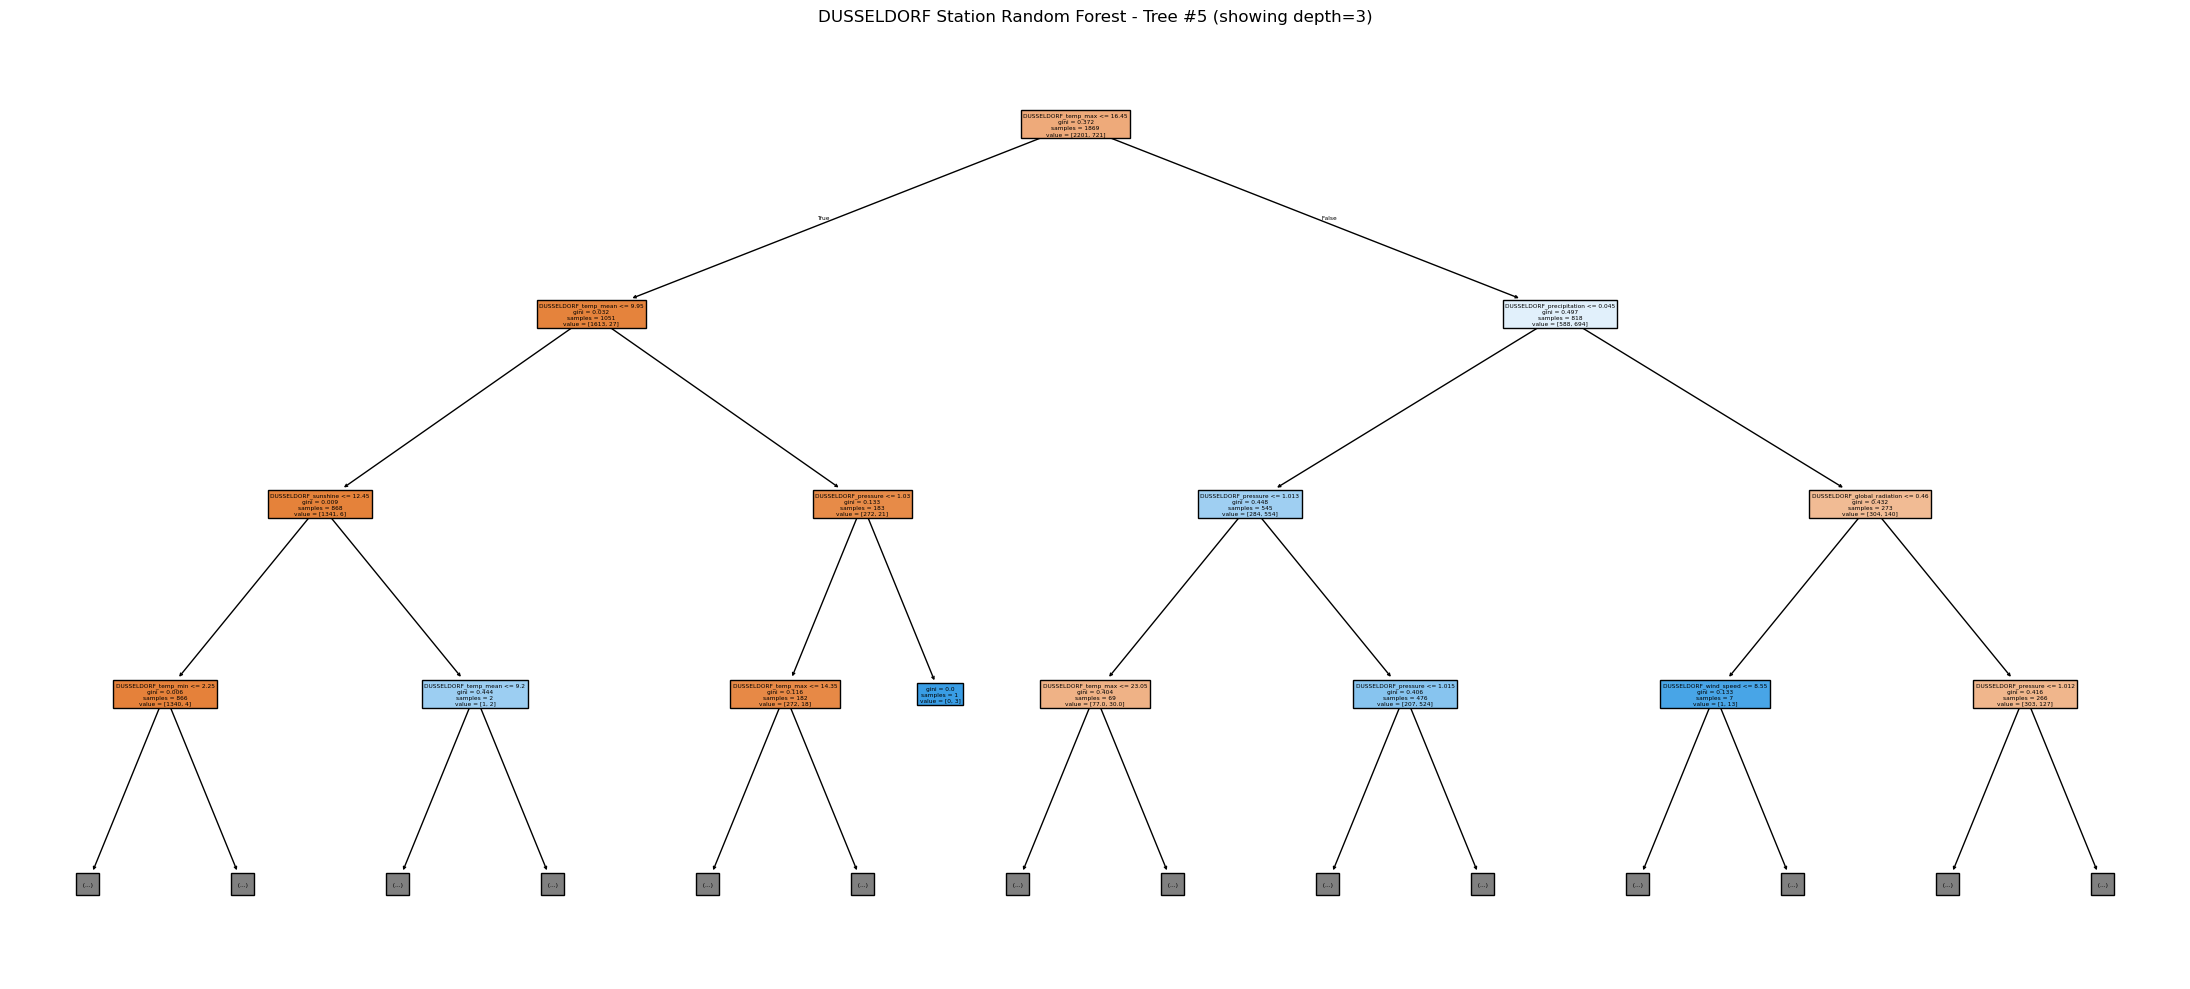

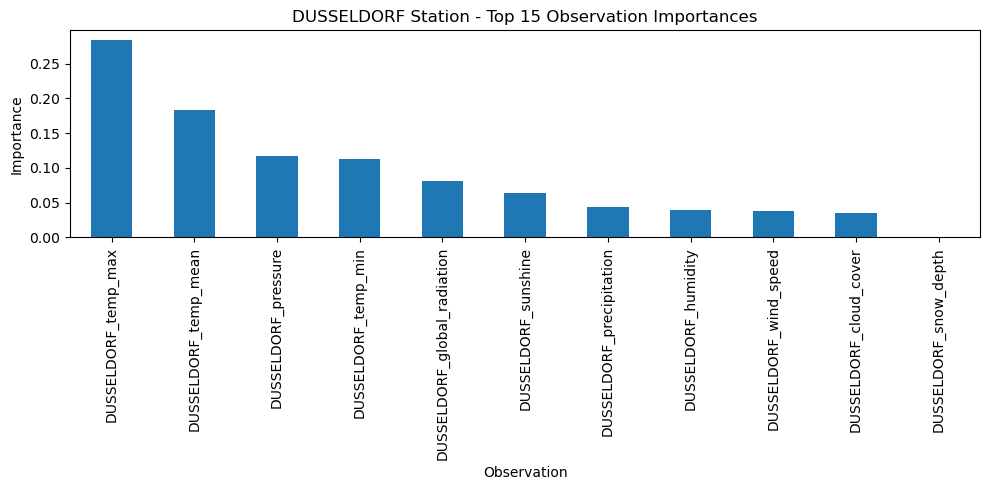


STATION MODEL: MUNCHENB
X_station shape: (3653, 9)
y_station shape: (3653,)
Target counts:
 target
0    2771
1     882
Name: count, dtype: int64
Accuracy: 0.8563611491108071


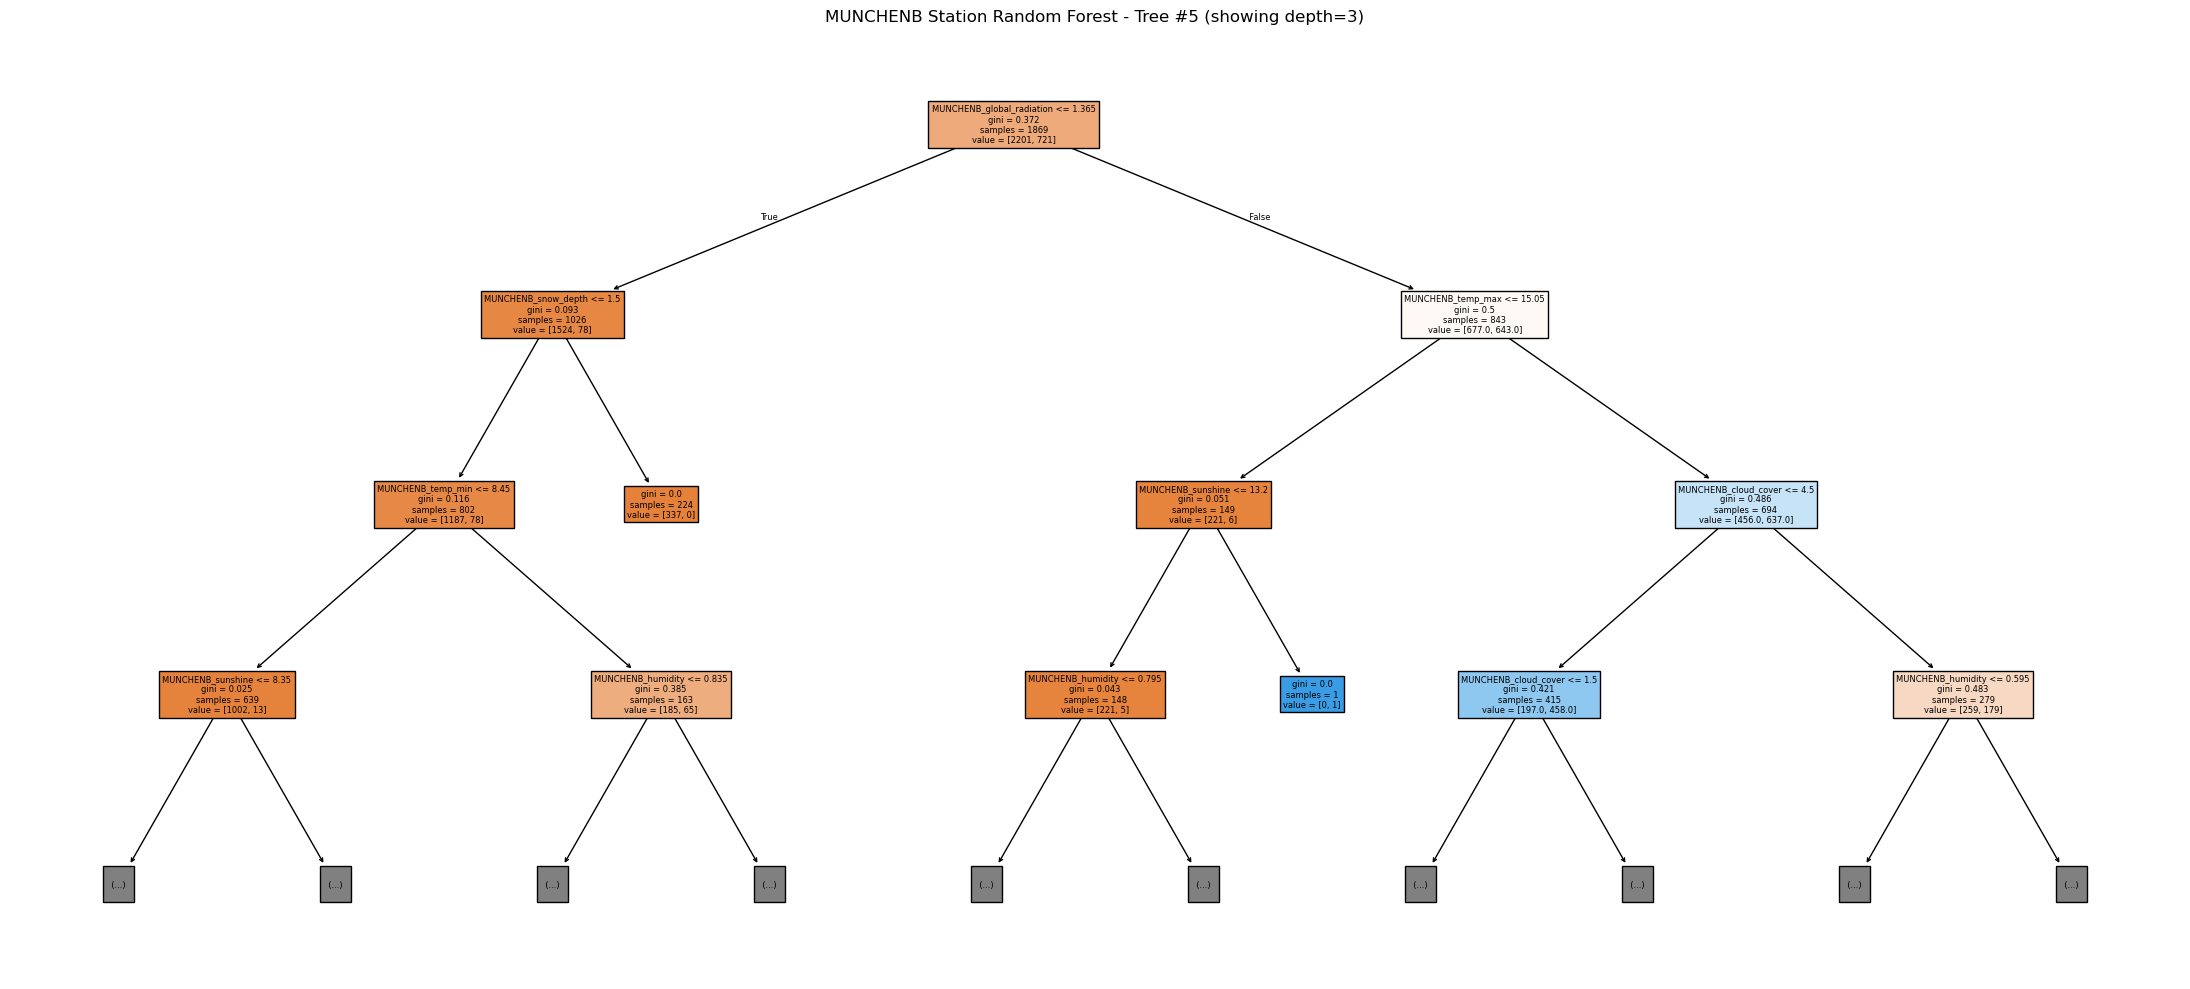

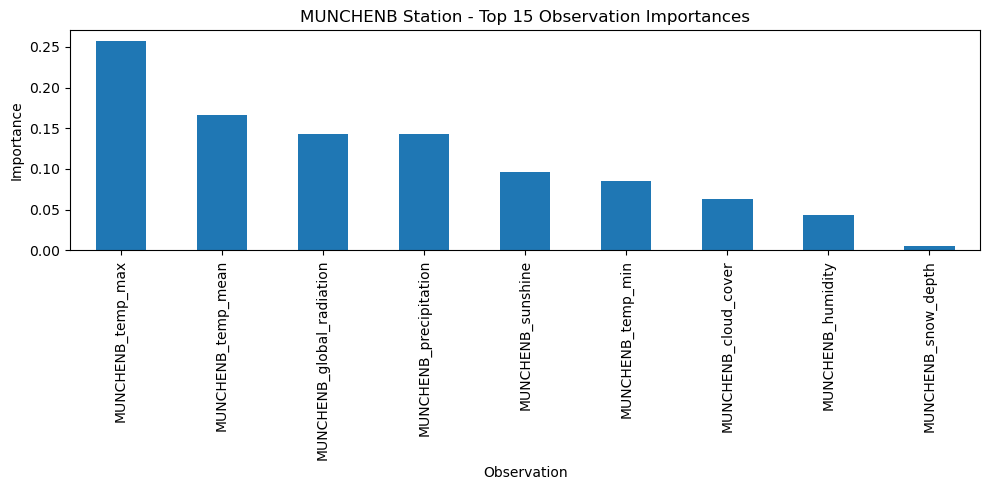


SUMMARY ACCURACIES
BASEL accuracy: 1.0
DUSSELDORF accuracy: 0.8399452804377565
MUNCHENB accuracy: 0.8563611491108071


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.tree import plot_tree

top3_stations = ['BASEL', 'DUSSELDORF', 'MUNCHENB']
target_col = "BASEL_pleasant_weather"  # keep same target as before (consistent)

results = {}

for st in top3_stations:
    print("\n" + "="*80)
    print(f"STATION MODEL: {st}")
    print("="*80)

    # --- Build station-only feature set (all columns that start with station + "_")
    station_features = [c for c in df.columns if c.startswith(st + "_")]

    # Remove target columns from features (avoid leakage)
    station_features = [c for c in station_features if "pleasant_weather" not in c]

    # Build X and y
    X_station_all = df[station_features].copy()
    y_all = df[target_col].copy()

    # Drop date-like columns if they accidentally got included (safe)
    X_station_all = X_station_all.drop(columns=["DATE", "MONTH"], errors="ignore")

    # Subset to decade-sized sample for speed (same approach as before)
    df_tmp = X_station_all.copy()
    df_tmp["target"] = y_all.values
    df_station = df_tmp.sample(n=3653, random_state=42)

    X_station = df_station.drop(columns=["target"])
    y_station = df_station["target"]

    print("X_station shape:", X_station.shape)
    print("y_station shape:", y_station.shape)
    print("Target counts:\n", y_station.value_counts())

    # --- Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_station, y_station, test_size=0.2, random_state=42, stratify=y_station
    )

    # --- Random Forest model
    clf_st = RandomForestClassifier(
        n_estimators=200,
        max_depth=8,
        random_state=42,
        n_jobs=-1
    )
    clf_st.fit(X_train, y_train)

    # --- Accuracy
    y_pred = clf_st.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    print("Accuracy:", acc)

    results[st] = {"accuracy": acc, "model": clf_st, "features": X_station.columns}

    # --- Tree plot (screenshot this)
    plt.figure(figsize=(22, 10))
    plot_tree(
        clf_st.estimators_[5],
        max_depth=3,
        filled=True,
        feature_names=X_station.columns
    )
    plt.title(f"{st} Station Random Forest - Tree #5 (showing depth=3)")
    plt.tight_layout()
    plt.show()

    # --- Observation-level importance plot for this station
    obs_imp = pd.Series(clf_st.feature_importances_, index=X_station.columns).sort_values(ascending=False)

    plt.figure(figsize=(10, 5))
    obs_imp.head(15).plot(kind="bar")
    plt.title(f"{st} Station - Top 15 Observation Importances")
    plt.ylabel("Importance")
    plt.xlabel("Observation")
    plt.tight_layout()
    plt.show()

print("\n" + "="*80)
print("SUMMARY ACCURACIES")
print("="*80)
for st in top3_stations:
    print(st, "accuracy:", results[st]["accuracy"])


In [24]:
import pandas as pd

accuracy_table = pd.DataFrame({
    "Station Model": ["All-stations (target=BASEL_pleasant_weather)", "BASEL-only", "DUSSELDORF-only", "MUNCHENB-only"],
    "Accuracy": [acc, results["BASEL"]["accuracy"], results["DUSSELDORF"]["accuracy"], results["MUNCHENB"]["accuracy"]]
})

accuracy_table


,Station Model,Accuracy
0,All-stations (target=BASEL_pleasant_weather),0.856361
1,BASEL-only,1.000000
2,DUSSELDORF-only,0.839945
3,MUNCHENB-only,0.856361


In [25]:
# Station importance table
station_importance_table = station_imp.reset_index()
station_importance_table.columns = ["Station", "Total Importance"]
station_importance_table.head(10)


,Station,Total Importance
0,BASEL,0.391706
1,DUSSELDORF,0.083208
2,MUNCHENB,0.069840
3,DEBILT,0.067815
4,TOURS,0.067515
5,MAASTRICHT,0.064188
6,LJUBLJANA,0.037424
7,HEATHROW,0.034054
8,MADRID,0.031509
9,OSLO,0.031210


In [26]:
import pandas as pd

for st in ['BASEL', 'DUSSELDORF', 'MUNCHENB']:
    clf_st = results[st]["model"]
    features = results[st]["features"]
    obs_imp = pd.Series(clf_st.feature_importances_, index=features).sort_values(ascending=False)

    print("\n", st, "Top 15 observations:")
    display(obs_imp.head(15))



 BASEL Top 15 observations:


BASEL_precipitation       0.293823
BASEL_temp_max            0.266350
BASEL_sunshine            0.121112
BASEL_global_radiation    0.109007
BASEL_temp_mean           0.097817
BASEL_temp_min            0.039315
BASEL_cloud_cover         0.036959
BASEL_humidity            0.017311
BASEL_pressure            0.014505
BASEL_wind_speed          0.003544
BASEL_snow_depth          0.000256
dtype: float64


 DUSSELDORF Top 15 observations:


DUSSELDORF_temp_max            0.283626
DUSSELDORF_temp_mean           0.183614
DUSSELDORF_pressure            0.117057
DUSSELDORF_temp_min            0.113398
DUSSELDORF_global_radiation    0.081282
DUSSELDORF_sunshine            0.063559
DUSSELDORF_precipitation       0.044208
DUSSELDORF_humidity            0.039678
DUSSELDORF_wind_speed          0.038121
DUSSELDORF_cloud_cover         0.035453
DUSSELDORF_snow_depth          0.000005
dtype: float64


 MUNCHENB Top 15 observations:


MUNCHENB_temp_max            0.257446
MUNCHENB_temp_mean           0.166003
MUNCHENB_global_radiation    0.142766
MUNCHENB_precipitation       0.142354
MUNCHENB_sunshine            0.095663
MUNCHENB_temp_min            0.085425
MUNCHENB_cloud_cover         0.062395
MUNCHENB_humidity            0.042953
MUNCHENB_snow_depth          0.004994
dtype: float64